# JD-NLP

This notebook tries to find out the key words from multiple JDs and find out the request from employer of DS/ML.

To use stopwords, lemm, wordcloud, we meed download : punkt, stopwords, worknet, averaged_perceptron_tagger

```python
$python3
>>>import nltk
>>>nltk.download('punkt')
...
>>>nltk.download('stopwords')
...
>>>nltk.download('wordnet')
...
>>>nltk.download('averaged_perceptron_tagger')
...


```



In [1]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize


import matplotlib.pyplot as plt

In [25]:
file_name = 'DataScientist.txt'
file_name = 'MachineLearning.txt'

with open(file_name) as f:
    text = f.read()
    
print(type(text))
print(len(text))

In [3]:
sentences = sent_tokenize(text)
words = word_tokenize(text)

print('Totle sentences:{}'.format(len(sentences)))
print('Totle words:{}'.format(len(words)))

Totle sentences:138
Totle words:4811


In [4]:
from nltk.probability import FreqDist


In [5]:
fdist = FreqDist(words)
fdist.most_common(10)

[(',', 264),
 ('and', 223),
 ('.', 126),
 ('to', 114),
 ('of', 104),
 ('the', 93),
 ('with', 87),
 ('a', 84),
 ('in', 79),
 ('data', 53)]

In [6]:
words_no_punc = [x.lower() for x in words if x.isalpha()]
print(len(words_no_punc))


4120


In [49]:
fd_no_punc = FreqDist(words_no_punc)
fd_no_punc.most_common(5)

[('and', 226), ('to', 116), ('of', 104), ('the', 104), ('with', 89)]

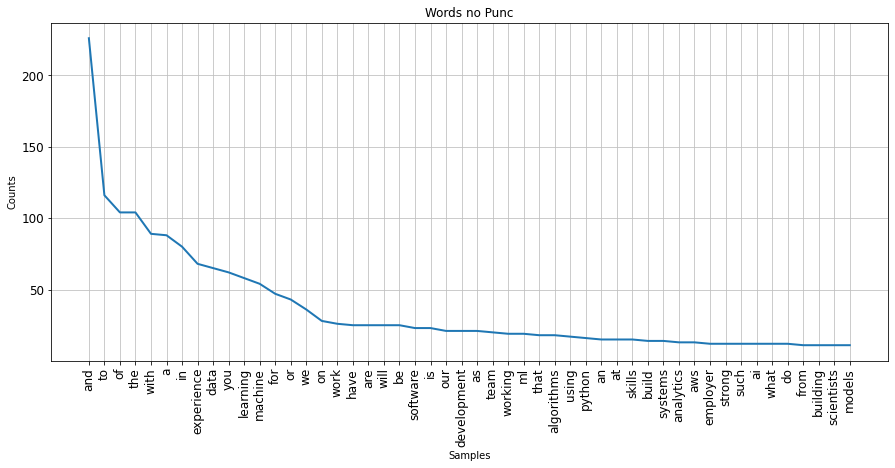

In [152]:
#%matplotlib agg 
%matplotlib inline

fig = plt.figure(figsize=(15,7))
plt.gcf().subplots_adjust(bottom=0.21) #否则X轴文本会被切掉
plt.tick_params(labelsize=12)
plt.xlabel('Keywords')
ax=fd_no_punc.plot(50, title='Words no Punc');
ax.set_xlabel('Keywords')
fig.savefig('WordsNoPunc.png')
plt.show()

In [9]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
print(len(stop_words))


179


In [20]:
type(stop_words), len(stop_words)

(list, 179)

In [109]:
clean_words = [x for x in words_no_punc if x not in stop_words]
print(len(clean_words))

2607


In [53]:
fd_clean_words = FreqDist(clean_words)
fd_clean_words.most_common(4)

[('experience', 68), ('data', 65), ('learning', 58), ('machine', 54)]

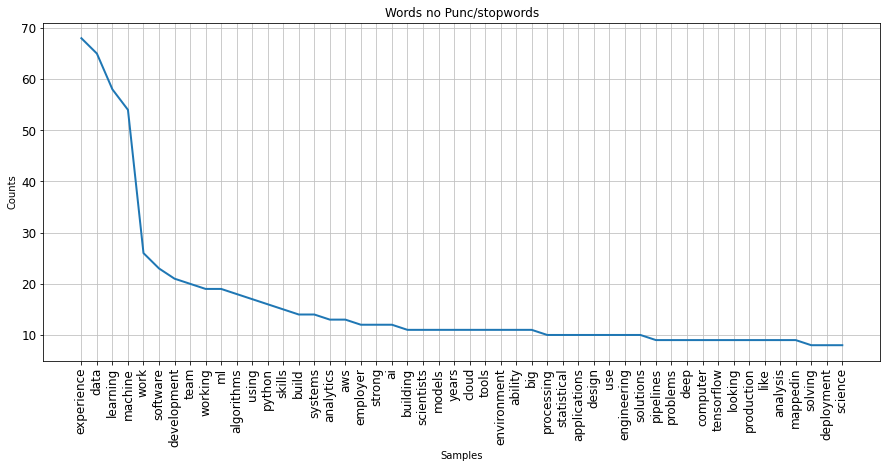

In [108]:
fig = plt.figure(figsize=(15,7))
plt.gcf().subplots_adjust(bottom=0.21) #否则X轴文本会被切掉
plt.tick_params(labelsize=12)

ax=fd_clean_words.plot(50, title='Words no Punc/stopwords')

ax.set_xlabel('Keywords')
fig.savefig('WordsNoPuncNoStopwords.png', dpi=120)
plt.show()


In [159]:
ignored_words = set(['you','work', 'working','use','skill','tool','year','system',
                     'software','experience','data','machine',
                    'learn'])
print(len(ignored_words))

13


In [61]:
wo_ignored_words = [w for w in clean_words if w not in  ignored_words]

print('Total clean wo ignored  words  ct:{}'.format(len(wo_ignored_words)))        

Total clean wo ignored  words  ct:2562


In [160]:
lem_wo_ignored_words = [w for w in lem_words if w not in  ignored_words]

print('Total lemmatized clean wo ignored  words  ct:{}'.format(len(lem_wo_ignored_words)))        

Total lemmatized clean wo ignored  words  ct:2192


In [161]:
fd_lem_wo_ignored_words = FreqDist(lem_wo_ignored_words)
fd_lem_wo_ignored_words.most_common(20)

[('model', 26),
 ('development', 21),
 ('team', 21),
 ('algorithm', 20),
 ('ml', 19),
 ('problem', 16),
 ('python', 16),
 ('build', 14),
 ('solve', 14),
 ('scientist', 14),
 ('analytics', 13),
 ('design', 13),
 ('language', 13),
 ('ability', 13),
 ('develop', 13),
 ('aws', 13),
 ('employer', 12),
 ('application', 12),
 ('product', 12),
 ('understand', 12)]

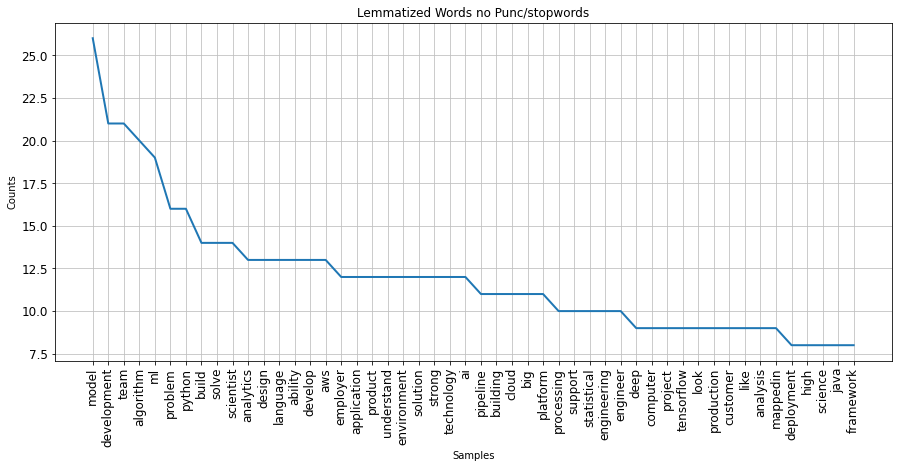

In [162]:
fig = plt.figure(figsize=(15,7))
plt.gcf().subplots_adjust(bottom=0.21) #否则X轴文本会被切掉
plt.tick_params(labelsize=12)

ax=fd_lem_wo_ignored_words.plot(50, title='Lemmatized Words no Punc/stopwords')

ax.set_xlabel('Keywords')
fig.savefig('LemmWordsNoPuncNoStopwordsNoIgnored.png', dpi=120)
plt.show()



In [63]:
fd_wo_ignored_words = FreqDist(wo_ignored_words)
fd_wo_ignored_words.most_common(20)

[('experience', 68),
 ('data', 65),
 ('learning', 58),
 ('machine', 54),
 ('software', 23),
 ('development', 21),
 ('team', 20),
 ('ml', 19),
 ('algorithms', 18),
 ('using', 17),
 ('python', 16),
 ('skills', 15),
 ('build', 14),
 ('systems', 14),
 ('analytics', 13),
 ('aws', 13),
 ('employer', 12),
 ('strong', 12),
 ('ai', 12),
 ('building', 11)]

In [ ]:
fdist = FreqDist(clean_words)
fdist.most_common(10)

In [153]:
from wordcloud import WordCloud


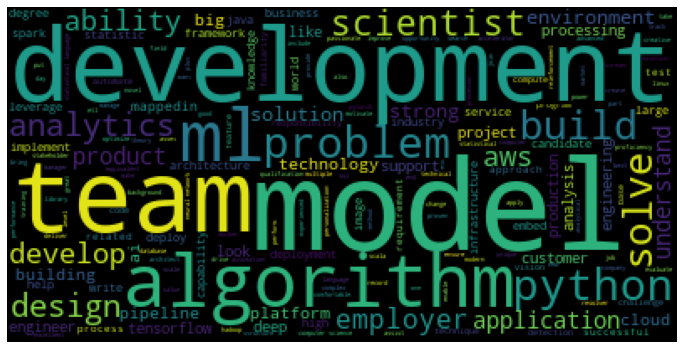

In [163]:
wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(lem_wo_ignored_words))

plt.figure(figsize = (12,12))
plt.imshow (wordcloud)

plt.axis('off')
plt.show()

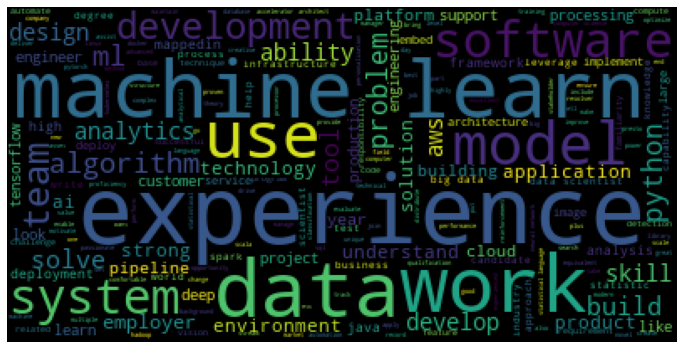

In [155]:
wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(lem_words))

plt.figure(figsize = (12,12))
plt.imshow (wordcloud)

plt.axis('off')
plt.show()

In [ ]:
wordcloud = WordCloud(stopwords=stop_words).generate(text)

plt.figure(figsize = (12,12))
plt.imshow (wordcloud)

plt.axis('off')
plt.show()

In [112]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('studies'))

study


In [115]:
print(len(clean_words))
lem_words = []
for w in clean_words:
    lem_words.append(lemmatizer.lemmatize(w))
print('words count after lemmatizer:{}'.format(len(lem_words)))    

2607
words count after lemmatizer:2607


In [ ]:
fd_lem_words = FreqDist(lem_words)
fd_lem_words.most_common(10)

In [124]:
tag = nltk.pos_tag(['working','built', 'building'])
tag

[('working', 'VBG'), ('built', 'VBN'), ('building', 'NN')]

In [130]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    '''Mapping POS tag to first character lemmatizer() accepts'''
    
    tag = nltk.pos_tag([word])[0][1][0].upper()  
    #eg, post_tag(['working']) will return [('working','VBG')]
    # so [0][1][0] will fetch 'V'
    tag_dict = {'J':wordnet.ADJ,
                'N':wordnet.NOUN,
                'V':wordnet.VERB,
                'R':wordnet.ADV,
               }
    
    return tag_dict.get(tag, wordnet.NOUN)


In [137]:
get_wordnet_pos('lost')

'v'

In [140]:
lem_words = [lemmatizer.lemmatize(x, get_wordnet_pos(x)) for x in clean_words]
print(len(lem_words))


2607


In [141]:
fd_lem_words = FreqDist(lem_words)
fd_lem_words.most_common(10)


[('experience', 69),
 ('data', 65),
 ('learn', 60),
 ('machine', 55),
 ('work', 48),
 ('use', 32),
 ('model', 26),
 ('software', 23),
 ('system', 22),
 ('development', 21)]

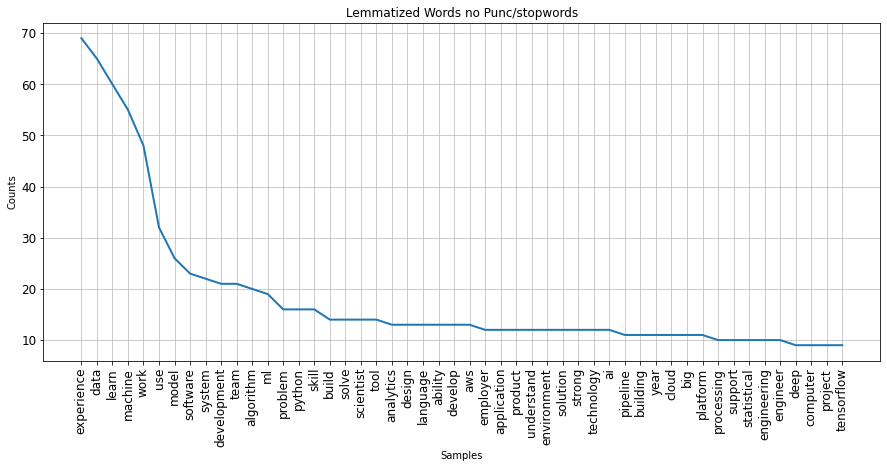

In [142]:
fig = plt.figure(figsize=(15,7))
plt.gcf().subplots_adjust(bottom=0.21) #否则X轴文本会被切掉
plt.tick_params(labelsize=12)

ax=fd_lem_words.plot(50, title='Lemmatized Words no Punc/stopwords')

ax.set_xlabel('Keywords')
fig.savefig('LemmWordsNoPuncNoStopwords.png', dpi=120)
plt.show()


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
vectorizer = TfidfVectorizer(norm = None)

X = vectorizer.fit_transform(sentences).toarray()

print(vectorizer.vocabulary_)

print(vectorizer.get_feature_names())

print(X)

In [ ]:
len(vectorizer.vocabulary_), len(vectorizer.get_feature_names())

In [ ]:
type(X),len(X), len(X[0])

In [ ]:
len(sentences)

In [ ]:
import pandas as pd

In [ ]:
tf_idf = pd.DataFrame(X).T

In [ ]:
tf_idf

In [ ]:
tf_idf.index = vectorizer.vocabulary_
tf_idf

In [ ]:
tf_idf['sum'] = tf_idf.sum( axis = 1)


In [ ]:
tf_idf.sort_values('sum', inplace=True, ascending=False)
tf_idf

In [ ]:
tf_idf['sum'][0:20]